# Spatio-temporal analysis

In [ ]:
import datetime

import pylandstats as pls

We are often interested in the analysis of the temporal evolution of the configuration and composition of a particular landscape. To that end, we will use the three extracts of [Veveyse district](https://en.wikipedia.org/wiki/Veveyse_District) from the [Swiss Land Statistics (SLS) datasets from the Swiss Federal Statistical Office](https://www.bfs.admin.ch/bfs/en/home/services/geostat/swiss-federal-statistics-geodata/land-use-cover-suitability/swiss-land-use-statistics.html) for the years 1992, 2004 and 2012.

We first need to run the cell below so that the land use/land cover (LULC) data is downloaded and preprocessed (see [A03-swisslandstats-preprocessing.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/A03-swisslandstats-preprocessing.ipynb) for more details).

In [ ]:
!make -C .. lulc_rasters

make: Entering directory '/home/martibosch/data-science/pylandstats-notebooks'
make: Nothing to be done for 'lulc_rasters'.
make: Leaving directory '/home/martibosch/data-science/pylandstats-notebooks'


We can now use the class `SpatioTemporalAnalysis`, which we can instantiate with a temporally-ordered sequence of landscape snapshots.

In [ ]:
URBAN_CLASS_VAL = 1
input_filepaths = [
    "../data/processed/veveyse-AS97R_4.tif",
    "../data/processed/veveyse-AS09R_4.tif",
    "../data/processed/veveyse-AS18_4.tif",
]
years = ["1992", "2004", "2012"]

sta = pls.SpatioTemporalAnalysis(input_filepaths, dates=years)
class_metrics_df = sta.compute_class_metrics_df()

## Spatio-temporal data frames

By now, `SpatioTemporalAnalysis` only supports class and landscape-level metrics, which can be computed by means of its methods `compute_class_metrics_df` and `compute_landscape_metrics_df` respectively. For instance, a data frame of the class-level metrics can be obtained as follows:

In [ ]:
class_metrics_df = sta.compute_class_metrics_df()
class_metrics_df.head()

metric           total_area  proportion_of_landscape  number_of_patches  \
class_val dates                                                           
1         1992        794.0                 5.910817              309.0   
          2004        906.0                 6.744584              304.0   
          2012       1041.0                 7.749572              287.0   
2         1992       7805.0                58.103179               54.0   
          2004       7692.0                57.261967               54.0   

metric           patch_density  largest_patch_index  total_edge  edge_density  \
class_val dates                                                                 
1         1992        2.300305             0.602993    227800.0     16.958237   
          2004        2.263083             0.699769    242000.0     18.015335   
          2012        2.136529             1.421872    256600.0     19.102211   
2         1992        0.401995            46.460210    661200.0     49.222065   
          2004        0.401995            45.723219    671500.0     49.988833   

metric           landscape_shape_index  effective_mesh_size     area_mn  ...  \
class_val dates                                                          ...   
1         1992               20.210526             0.994566    2.569579  ...   
          2004               20.065574             1.482617    2.980263  ...   
          2012               19.969231             3.877838    3.627178  ...   
2         1992               19.943503          2950.532197  144.537037  ...   
          2004               20.346591          2851.566292  142.444444  ...   

metric           fractal_dimension_md  fractal_dimension_ra  \
class_val dates                                               
1         1992               1.000000              0.197592   
          2004               1.000000              0.206568   
          2012               1.000000              0.220343   
2         1992               1.027906              0.306079   
          2004               1.037246              0.309307   

metric           fractal_dimension_sd  fractal_dimension_cv  \
class_val dates                                               
1         1992               0.041018              4.015750   
          2004               0.042808              4.182610   
          2012               0.045077              4.402981   
2         1992               0.068492              6.477715   
          2004               0.068840              6.484687   

metric           euclidean_nearest_neighbor_mn  euclidean_nearest_neighbor_am  \
class_val dates                                                                 
1         1992                      299.844593                     249.407695   
          2004                      301.021934                     241.167503   
          2012                      309.244705                     240.805397   
2         1992                      233.061438                     203.596395   
          2004                      232.748241                     203.015103   

metric           euclidean_nearest_neighbor_md  euclidean_nearest_neighbor_ra  \
class_val dates                                                                 
1         1992                      223.606798                     940.175425   
          2004                      223.606798                    1100.000000   
          2012                      223.606798                    1100.000000   
2         1992                      200.000000                     561.577311   
          2004                      200.000000                     624.621125   

metric           euclidean_nearest_neighbor_sd  euclidean_nearest_neighbor_cv  
class_val dates                                                                
1         1992                      156.817097                      52.299458  
          2004                      162.962720                      54.136494  
     

Again, we can use the operations of any pandas data frame. For instance, we can get all the metrics for the *urban* class (`class_val` of 1) in 1992:

In [ ]:
class_metrics_df.loc[(1, "1992")]

metric
total_area                          794.000000
proportion_of_landscape               5.910817
number_of_patches                   309.000000
patch_density                         2.300305
largest_patch_index                   0.602993
total_edge                       227800.000000
edge_density                         16.958237
landscape_shape_index                20.210526
effective_mesh_size                   0.994566
area_mn                               2.569579
area_am                              16.826196
area_md                               1.000000
area_ra                              80.000000
area_sd                               6.052562
area_cv                             235.546813
perimeter_mn                        745.631068
perimeter_am                       3215.617128
perimeter_md                        400.000000
perimeter_ra                      12200.000000
perimeter_sd                       1077.283233
perimeter_cv                        144.479392
perime

Similarly, the data frame of landscape metrics can be obtained as follows:

In [ ]:
sta.compute_landscape_metrics_df()

metric,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,effective_mesh_size,entropy,shannon_diversity_index,...,fractal_dimension_md,fractal_dimension_ra,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv
dates,,,,,,,,,,,,,,,,,,,,,
1992,13433.0,687.0,5.114271,46.460210,730800.0,54.403335,17.870690,3670.101913,1.343467,0.931221,...,1.0,0.306079,0.048155,4.684560,308.379611,212.349764,223.606798,3124.154028,219.194252,71.079359
2004,13433.0,689.0,5.129160,45.723219,739700.0,55.065883,18.062500,3574.739894,1.363540,0.945134,...,1.0,0.309307,0.048268,4.693809,309.626880,211.870371,223.606798,3124.154028,227.583997,73.502661
2012,13433.0,665.0,4.950495,44.807563,749500.0,55.795429,18.273707,3461.884836,1.391901,0.964792,...,1.0,0.311892,0.049667,4.822265,309.041400,213.949783,223.606798,3124.154028,225.342246,72.916524


### Customizing your spatio-temporal analysis

As within the `Landscape` analysis, we can also choose to compute a subset of metrics by passing them to the `metrics` keyword argument of the `compute_class_metrics_df` and `compute_landscape_metrics_df` methods, as in:

In [ ]:
metrics = ["proportion_of_landscape", "edge_density", "fractal_dimension_am"]
sta.compute_class_metrics_df(metrics=metrics)

metric           proportion_of_landscape  edge_density  fractal_dimension_am
class_val dates                                                             
1         1992                  5.910817     16.958237              1.083145
          2004                  6.744584     18.015335              1.089937
          2012                  7.749572     19.102211              1.113777
2         1992                 58.103179     49.222065              1.285986
          2004                 57.261967     49.988833              1.287143
          2012                 56.271868     50.599270              1.287897
3         1992                 33.715477     38.338420              1.235716
          2004                 33.894141     38.286310              1.233035
          2012                 33.946252     38.167200              1.232546
4         1992                  2.270528      4.287948              1.069879
          2004                  2.099308      3.841286              1.069110
          2012                  2.032308      3.722177              1.073387

At the class-level, we can choose to compute the metrics only for a subset of classes through the `classes` argument. We can simoultaneously choose a subset of metrics as well as a subset of classes by specifying both the `metrics` and `classes` arguments. For instance, we can choose to only compute the above metrics and only for the *urban* class (value of 1):

In [ ]:
sta.compute_class_metrics_df(metrics=metrics, classes=[URBAN_CLASS_VAL])

metric           proportion_of_landscape  edge_density  fractal_dimension_am
class_val dates                                                             
1         1992                  5.910817     16.958237              1.083145
          2004                  6.744584     18.015335              1.089937
          2012                  7.749572     19.102211              1.113777

In both the `compute_class_metrics_df` and `compute_landscape_metrics_df` methods, we can also customize how some metrics are computed through the `metrics_kws` argument:

In [ ]:
metrics_kws = {
    "proportion_of_landscape": {"percent": False},
    "edge_density": {"count_boundary": True},
}
sta.compute_class_metrics_df(
    metrics=metrics, classes=[URBAN_CLASS_VAL], metrics_kws=metrics_kws
)

metric           proportion_of_landscape  edge_density  fractal_dimension_am
class_val dates                                                             
1         1992                  0.059108     17.151790              1.083145
          2004                  0.067446     18.223777              1.089937
          2012                  0.077496     19.325542              1.113777

On the other hand, the `dates` keyword argument might also be provided as string or `datetime` objects, e.g.:

In [ ]:
dates = [datetime.date(int(year), 1, 1) for year in years]
sta = pls.SpatioTemporalAnalysis(input_filepaths, dates=dates)
sta.compute_landscape_metrics_df()

metric,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,effective_mesh_size,entropy,shannon_diversity_index,...,fractal_dimension_md,fractal_dimension_ra,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv
dates,,,,,,,,,,,,,,,,,,,,,
1992-01-01,13433.0,687.0,5.114271,46.460210,730800.0,54.403335,17.870690,3670.101913,1.343467,0.931221,...,1.0,0.306079,0.048155,4.684560,308.379611,212.349764,223.606798,3124.154028,219.194252,71.079359
2004-01-01,13433.0,689.0,5.129160,45.723219,739700.0,55.065883,18.062500,3574.739894,1.363540,0.945134,...,1.0,0.309307,0.048268,4.693809,309.626880,211.870371,223.606798,3124.154028,227.583997,73.502661
2012-01-01,13433.0,665.0,4.950495,44.807563,749500.0,55.795429,18.273707,3461.884836,1.391901,0.964792,...,1.0,0.311892,0.049667,4.822265,309.041400,213.949783,223.606798,3124.154028,225.342246,72.916524


## Plots

One of the most important features of `SpatioTemporalAnalysis` is to plot the evolution of the metrics. We can plot the proportion o landscape occupied by the *urban* class (`class_val` of 1) as in:

<AxesSubplot:ylabel='PLAND'>

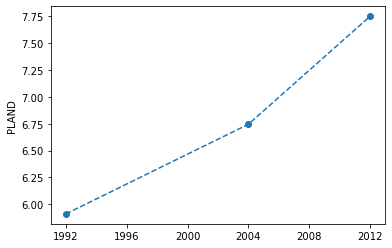

In [ ]:
sta.plot_metric("proportion_of_landscape", class_val=URBAN_CLASS_VAL)

If we want to plot the evolution of a metric at the landscape level, we can do so by using the same `plot_metric` method, but without setting the `class_val` argument. Note however that we cannot compute the `proportion_of_landscape` at the landscape level (we could but it makes no sense, the landscape always occupies 100% of the landscape). Similarly, some metrics such as `shannon_diversity_index` cannot be computed at the class level but only at the landscape level. See the documentation of each metric for more details.

Let's then plot the area-weighted fractal dimension, that is `fractal_dimension_am`, at both the class and landscape level:

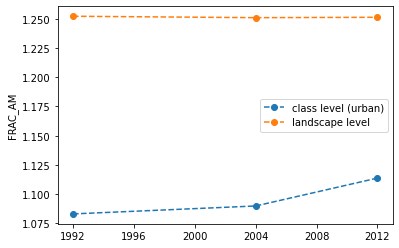

In [ ]:
ax = sta.plot_metric(
    "fractal_dimension_am",
    class_val=URBAN_CLASS_VAL,
    plot_kws={"label": "class level (urban)"},
)
_ = sta.plot_metric(
    "fractal_dimension_am", ax=ax, plot_kws={"label": "landscape level"}
)
ax.legend()

Note that we can pass keyword arguments to matplotlib's `plot` method through the `plt_kws` argument of `plot_metric`. See the documentation of  [SpatioTemporalAnalysis.plot_metric](https://pylandstats.readthedocs.io/en/latest/spatiotemporal.html#pylandstats.SpatioTemporalAnalysis.plot_metric) for more details.

## See also

* [SpatioTemporalBufferAnalysis](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/04-spatiotemporal-buffer-analysis.ipynb)